In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
df=pd.read_csv('/content/drive/MyDrive/car_evaluation.csv')


In [84]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [85]:
miss=df.isnull().sum()
miss

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [86]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df=df.apply(le.fit_transform)
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [87]:
# df=pd.DataFrame(k)
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


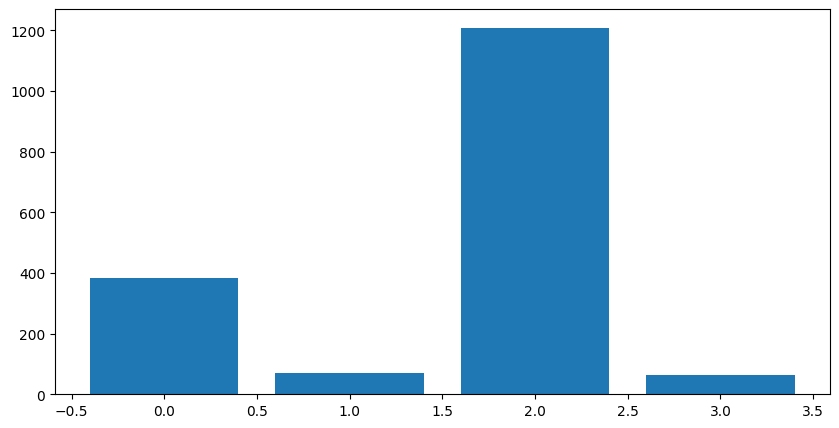

In [88]:
plt.figure(figsize=(10,5))
class_counts = df['unacc'].value_counts()

# إنشاء المخطط
plt.bar(class_counts.index, class_counts.values)
plt.show()

In [89]:
from imblearn.over_sampling import SMOTE
y=df['unacc']
x = df.drop('unacc', axis=1)  # Specify axis=1 to drop a column
smote=SMOTE(k_neighbors=4)
x_re,y_re=smote.fit_resample(x,y)

In [90]:
df=pd.DataFrame(x_re)
df = pd.concat([df, pd.DataFrame(y_re)], axis=1) # Use

In [91]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
4831,2,1,2,1,1,0,3
4832,1,0,0,1,0,0,3
4833,1,0,0,2,0,0,3
4834,1,0,2,1,1,0,3


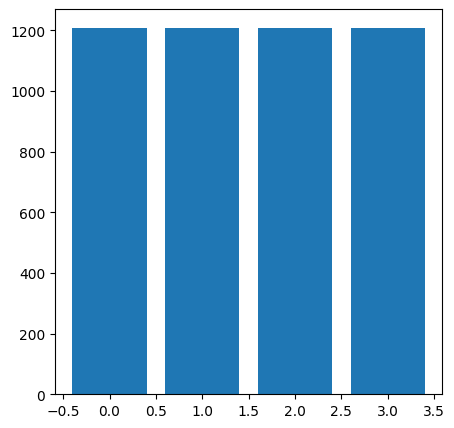

In [92]:
plt.figure(figsize=(5,5))
class_counts = df['unacc'].value_counts()

# إنشاء المخطط
plt.bar(class_counts.index, class_counts.values)
plt.show()

In [100]:
from sklearn.preprocessing import MinMaxScaler

s=MinMaxScaler()

x=s.fit_transform(x_re)

df=pd.DataFrame(x)
df = pd.concat([df, pd.DataFrame(y_re)], axis=1) # Use



In [101]:
df

,0,1,2,3,4,5,unacc
0,1.000000,1.000000,0.000000,0.0,1.0,1.0,2
1,1.000000,1.000000,0.000000,0.0,1.0,0.0,2
2,1.000000,1.000000,0.000000,0.0,0.5,0.5,2
3,1.000000,1.000000,0.000000,0.0,0.5,1.0,2
4,1.000000,1.000000,0.000000,0.0,0.5,0.0,2
...,...,...,...,...,...,...,...
4831,0.666667,0.333333,0.666667,0.5,0.5,0.0,3
4832,0.333333,0.000000,0.000000,0.5,0.0,0.0,3
4833,0.333333,0.000000,0.000000,1.0,0.0,0.0,3
4834,0.333333,0.000000,0.666667,0.5,0.5,0.0,3


In [105]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
x=df.drop('unacc',axis=1)
y=df['unacc']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

accuracy = accuracy_score(y_test, y_pred)
print(f'test Accuracy: {accuracy * 100:.2f}%')

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

Training Accuracy: 100.00%
test Accuracy: 99.59%
Confusion Matrix:
 [[236   1   3   0]
 [  0 238   0   0]
 [  0   0 248   0]
 [  0   0   0 242]]
